In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np



In [3]:
IMG_HEIGHT=48 
IMG_WIDTH = 48
batch_size=32

train_data_dir='C:/Users/jssri/Downloads/train'
validation_data_dir='C:/Users/jssri/Downloads/test'

In [4]:
train_datagen = ImageDataGenerator(
					rescale=1./255, #Scales the pixel values to a range between 0 and 1 by  helps in better convergence
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

#Verify our generator by plotting a few faces and printing corresponding labels
class_labels=['angry','disgust', 'fear', 'happy','neutral','sad','surprise']

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
img, label = train_generator.__next__()


In [6]:
import random

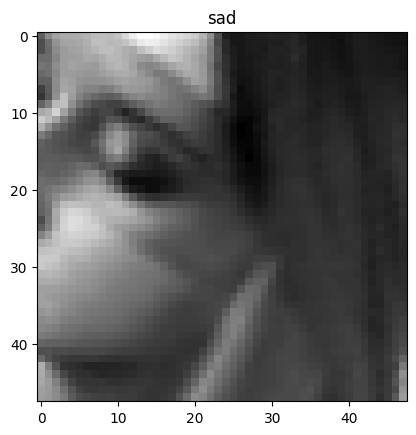

In [7]:
i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [8]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [9]:
train_path='C:/Users/jssri/Downloads/train'
test_path='C:/Users/jssri/Downloads/test'

In [22]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)


epochs=50

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size)


Epoch 1/50
897/897 [==============================] - 2392s 3s/step - loss: 1.7681 - accuracy: 0.2678 - val_loss: 1.6681 - val_accuracy: 0.3359
Epoch 2/50
897/897 [==============================] - 637s 710ms/step - loss: 1.6418 - accuracy: 0.3448 - val_loss: 1.4362 - val_accuracy: 0.4611
Epoch 3/50
897/897 [==============================] - 635s 708ms/step - loss: 1.5041 - accuracy: 0.4140 - val_loss: 1.3349 - val_accuracy: 0.4792
Epoch 4/50
897/897 [==============================] - 639s 713ms/step - loss: 1.4212 - accuracy: 0.4522 - val_loss: 1.2499 - val_accuracy: 0.5255
Epoch 5/50
897/897 [==============================] - 1658s 2s/step - loss: 1.3707 - accuracy: 0.4739 - val_loss: 1.2109 - val_accuracy: 0.5349
Epoch 6/50
897/897 [==============================] - 259s 289ms/step - loss: 1.3322 - accuracy: 0.4884 - val_loss: 1.1938 - val_accuracy: 0.5488
Epoch 7/50
897/897 [==============================] - 262s 292ms/step - loss: 1.3035 - accuracy: 0.5032 - val_loss: 1.1681 - val

In [23]:
model.save('emotion_detection_model_100epochs.h5')

C:\Users\jssri\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
from keras.models import load_model

# Load the saved model
model = load_model('emotion_detection_model_100epochs.h5')


num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)


epochs=5
history = model.fit(
    train_generator,
    steps_per_epoch=num_train_imgs // batch_size,
    epochs=additional_epochs,
    validation_data=validation_generator,
    validation_steps=num_test_imgs // batch_size
)

# Save the updated model
model.save('emotion_detection_model_100epochs.h5')


Epoch 1/5
897/897 [==============================] - 1382s 2s/step - loss: 1.0684 - accuracy: 0.5953 - val_loss: 1.0394 - val_accuracy: 0.6166
Epoch 2/5
897/897 [==============================] - 596s 664ms/step - loss: 1.0644 - accuracy: 0.5961 - val_loss: 1.0333 - val_accuracy: 0.6113
Epoch 3/5
897/897 [==============================] - 368s 410ms/step - loss: 1.0570 - accuracy: 0.6013 - val_loss: 1.0306 - val_accuracy: 0.6126
Epoch 4/5
897/897 [==============================] - 305s 340ms/step - loss: 1.0593 - accuracy: 0.6041 - val_loss: 1.0379 - val_accuracy: 0.6159
Epoch 5/5
897/897 [==============================] - 239s 267ms/step - loss: 1.0650 - accuracy: 0.5998 - val_loss: 1.0311 - val_accuracy: 0.6129


C:\Users\jssri\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing the model

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array


In [2]:
model = load_model('emotion_detection_model_100epochs.h5', compile=False)


In [3]:
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

def detect_emotion(frame):
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the frame using Haar Cascade Classifier
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        face_roi = gray[y:y + h, x:x + w]
        face_roi = cv2.resize(face_roi, (48, 48))
        face_roi = face_roi.astype("float") / 255.0
        face_roi = img_to_array(face_roi)
        face_roi = np.expand_dims(face_roi, axis=0)
        
        emotion_prediction = model.predict(face_roi)[0]
        emotion_label = emotion_labels[np.argmax(emotion_prediction)]
        
        cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
    return frame


In [4]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [5]:
cap = cv2.VideoCapture(0)  # 0 for default camera

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    frame = detect_emotion(frame)
    
    cv2.imshow('Facial Emotion Recognition', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 25ms/step
